In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [138]:
df = pd.read_csv('../data/learning_data.csv')
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [140]:
df.describe()

,label,scc,C-75443-2,C-84215-3,C-26453-1,C-26464-8,C-26515-7,C-30385-9,C-30428-7,C-33037-3,...,C-713-8,C-727711,C-731-0,C-736-9,C-742-7,C-751-8,C-770-8,C-82078001,C-86849004,C-86964003
count,9048.000000,9048.000000,16.0,16.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,256.000000,0.0,256.000000,256.00000,256.000000,256.000000,256.000000,0.0,0.0,0.0
mean,0.252874,103.895999,1.0,1.0,5.125166,13.175497,308.200662,13.006623,87.692715,8.339073,...,4.513672,NaN,0.945664,15.17957,0.948047,2.679688,27.573555,NaN,NaN,NaN
std,0.434683,21.988655,0.0,0.0,0.379863,1.223817,88.495507,0.899605,4.636940,3.508351,...,0.255184,NaN,0.154276,1.67533,0.075522,0.225392,3.014690,NaN,NaN,NaN
min,0.000000,9.000000,1.0,1.0,4.500000,11.100000,155.300000,11.600000,80.000000,2.000000,...,3.740000,NaN,0.500000,10.32000,0.750000,2.080000,18.610000,NaN,NaN,NaN
25%,0.000000,100.000000,1.0,1.0,4.800000,12.000000,232.950000,12.150000,83.600000,5.500000,...,4.370000,NaN,0.980000,14.08250,0.900000,2.540000,25.457500,NaN,NaN,NaN
50%,0.000000,107.000000,1.0,1.0,5.100000,13.400000,304.100000,13.100000,88.100000,8.200000,...,4.500000,NaN,1.000000,15.19000,0.950000,2.690000,27.840000,NaN,NaN,NaN
75%,1.000000,116.000000,1.0,1.0,5.400000,14.300000,386.550000,13.800000,91.400000,11.350000,...,4.680000,NaN,1.020000,16.38500,1.000000,2.830000,29.502500,NaN,NaN,NaN
max,1.000000,190.000000,1.0,1.0,5.900000,15.000000,449.900000,14.600000,96.000000,14.900000,...,5.240000,NaN,1.090000,20.15000,1.160000,3.260000,34.850000,NaN,NaN,NaN


In [141]:
null_percentages = df.isnull().mean()
columns_with_nulls_over_60_percent = null_percentages[null_percentages>0.6]
columns_with_nulls_over_60_percent_df = columns_with_nulls_over_60_percent.reset_index()
columns_with_nulls_over_60_percent_df.columns = ['Column', 'Nulls']
print('10 pierwszych kolumn z 60% null')
columns_with_nulls_over_60_percent_df.head(10)

10 pierwszych kolumn z 60% null


,Column,Nulls
0,C-762993000,0.625221
1,C-2857-1,0.750663
2,C-410006001,0.750663
3,C-10834-0,0.610522
4,C-10509002,0.608311
5,C-58000006,0.723696
6,C-46288-7,0.811561
7,C-65575008,0.811561
8,C-314231,0.764699
9,C-314076,0.725796


In [142]:
df = df.drop(columns_with_nulls_over_60_percent.index, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ptnum              9048 non-null   object
 1   label              9048 non-null   int64 
 2   scc                9048 non-null   int64 
 3   C-103579009        9048 non-null   object
 4   C-125680007        9048 non-null   object
 5   C-186034007        9048 non-null   object
 6   C-263495000        9048 non-null   object
 7   C-398070004        9048 non-null   object
 8   C-424144002        9048 non-null   object
 9   C-72514-3          9044 non-null   object
 10  C-140              9043 non-null   object
 11  C-18262-6          9043 non-null   object
 12  C-2085-9           9043 non-null   object
 13  C-2093-3           9043 non-null   object
 14  C-2571-8           9043 non-null   object
 15  C-39156-5          9043 non-null   object
 16  C-710824005        9043 non-null   object


In [143]:
df = df.drop('ptnum', axis=1)

# Odkodowanie nazwy kolumn

In [144]:
df_codes = pd.read_csv('../data/codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
code_to_name
df = df.rename(columns=code_to_name)
df.to_csv('ponad_60_procent_bez_nuli.csv', index=False)
df.head()

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature,Initial patient assessment (procedure),Development of individualized plan of care (procedure),Depression screening using Patient Health Questionnaire Nine Item score (procedure),Acetaminophen 325 MG Oral Tablet,Acute viral pharyngitis (disorder),Hospice care (regime/therapy),Notifications (procedure),Certification procedure (procedure)
0,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,normal,True,True,True,True,True,NaN,NaN,NaN
1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,True,...,normal,NaN,True,True,True,True,NaN,True,True,True
2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,normal,NaN,True,True,NaN,True,NaN,True,True,True
3,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,normal,NaN,True,True,True,True,NaN,True,True,True
4,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [145]:
column_names = df.columns
print(column_names)

Index(['label', 'scc', 'race', 'marital', 'ethnic', 'gender', 'state', 'age',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Influenza  seasonal  injectable  preservative free',
       'Low Density Lipoprotein Cholesterol',
       'High Density Lipoprotein Cholesterol', 'Total Cholesterol',
       'Triglycerides', 'Body Mass Index',
       'Assessment of health and social care needs (procedure)',
       'Tobacco smoking status NHIS', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart rate', 'Respiratory rate',
       'Stress (finding)', 'Depression screening (procedure)',
       'Depression screening using Patient Health Questionnaire Two-Item score (procedure)',
       'Hemoglobin [Mass/volume] in Blood',
       'Erythrocyte distribution width [Entitic volume] by Automated count',
       'Platelet mean volume [Entitic volume] in Blood by Automated count',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Platelets [#

# Rozkład zmiennych kategorycznych

In [146]:
categorical_columns = df.select_dtypes(include = ['object'])

In [147]:
df.shape

(9048, 74)

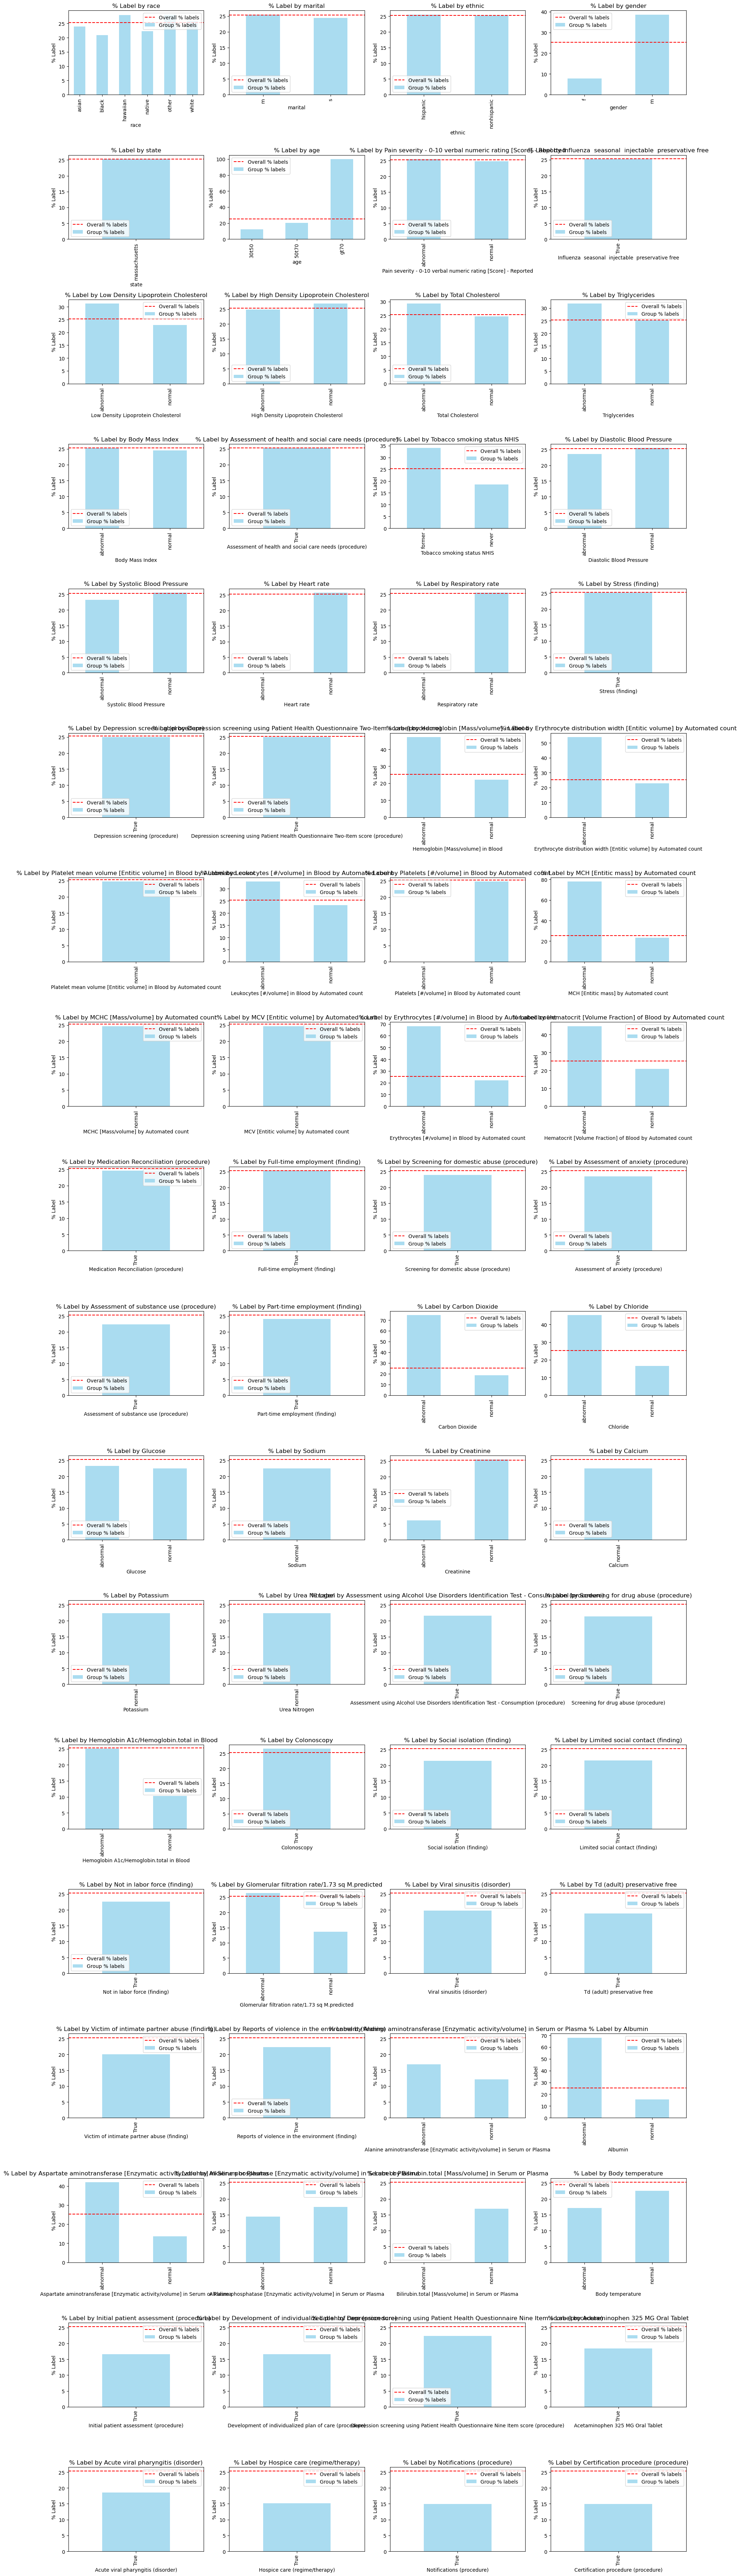

In [148]:
label_percentage = {}
for column in categorical_columns:
    label_percentage[column] = df.groupby(column)['label'].mean() * 100

overall_label_percentage = df['label'].mean() * 100

fig, axes = plt.subplots(nrows = 18, ncols = 4, figsize = (18, 72))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    label_percentage[column].plot(kind = 'bar', ax = ax, color = 'skyblue', alpha = 0.7, label = 'Group % labels')
    ax.axhline(overall_label_percentage, color = 'red', linestyle = '--', label = 'Overall % labels')
    ax.set_title(f'% Label by {column}')
    ax.set_ylabel('% Label')
    ax.legend()

plt.tight_layout()
plt.show()

# Przygotowanie ramki danych

### Zmienne kategoryczne
Zmiana zmiennych kategorycznych na numeryczne

In [149]:
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)
df_encoded
df_encoded.to_csv("kategoryczne_na_numeryczne.csv")
for i in range(len(df_encoded.columns)):
    column = df_encoded.columns[i]
    print(f"Kolumna {i}: {column}")
    print(f"  Zmienne kategoryczne: {label_encoder.classes_}")
    print(f"  Mapowanie: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

Kolumna 0: label
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 1: scc
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 2: race
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 3: marital
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 4: ethnic
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 5: gender
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 6: state
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 7: age
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 8: Pain severity - 0-10 verbal numeric rating [Score] - Reported
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 9: Influenza  seasonal  injectable  preservative free
  Zmienne kategoryczne: [True nan]
  Mapowanie: {True: 0, nan: 1}
Kolumna 10: Low Density Lipoprotein Cholesterol
  Zmienne kategoryczne

In [150]:
df_encoded

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature,Initial patient assessment (procedure),Development of individualized plan of care (procedure),Depression screening using Patient Health Questionnaire Nine Item score (procedure),Acetaminophen 325 MG Oral Tablet,Acute viral pharyngitis (disorder),Hospice care (regime/therapy),Notifications (procedure),Certification procedure (procedure)
0,0,74,5,0,1,1,0,1,0,0,...,2,1,0,0,0,0,0,1,1,1
1,0,83,5,0,1,1,0,1,1,0,...,1,2,0,0,0,0,1,0,0,0
2,0,100,1,0,1,1,0,1,0,0,...,1,2,0,0,1,0,1,0,0,0
3,0,102,5,0,1,1,0,1,0,0,...,1,2,0,0,0,0,1,0,0,0
4,1,42,5,0,1,1,0,1,0,0,...,2,2,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,0,75,5,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
9044,0,95,5,0,1,1,0,1,1,0,...,1,0,1,1,1,1,1,1,1,1
9045,0,94,5,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9046,1,59,5,0,1,1,0,1,0,0,...,2,0,0,0,0,1,0,1,1,1


In [110]:
# unikalne = df_encoded['ethnic'].unique()
# print("Unikalne : ", unikalne)

Unikalne :  [1 0]


# Rozkład zmiennych kategorycznych - po zamianie je na numeryczne

In [153]:
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature,Initial patient assessment (procedure),Development of individualized plan of care (procedure),Depression screening using Patient Health Questionnaire Nine Item score (procedure),Acetaminophen 325 MG Oral Tablet,Acute viral pharyngitis (disorder),Hospice care (regime/therapy),Notifications (procedure),Certification procedure (procedure)
0,0,74,5,0,1,1,0,1,0,0,...,2,1,0,0,0,0,0,1,1,1
1,0,83,5,0,1,1,0,1,1,0,...,1,2,0,0,0,0,1,0,0,0
2,0,100,1,0,1,1,0,1,0,0,...,1,2,0,0,1,0,1,0,0,0
3,0,102,5,0,1,1,0,1,0,0,...,1,2,0,0,0,0,1,0,0,0
4,1,42,5,0,1,1,0,1,0,0,...,2,2,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,0,75,5,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
9044,0,95,5,0,1,1,0,1,1,0,...,1,0,1,1,1,1,1,1,1,1
9045,0,94,5,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9046,1,59,5,0,1,1,0,1,0,0,...,2,0,0,0,0,1,0,1,1,1


In [155]:
df_encoded.shape

(9048, 74)

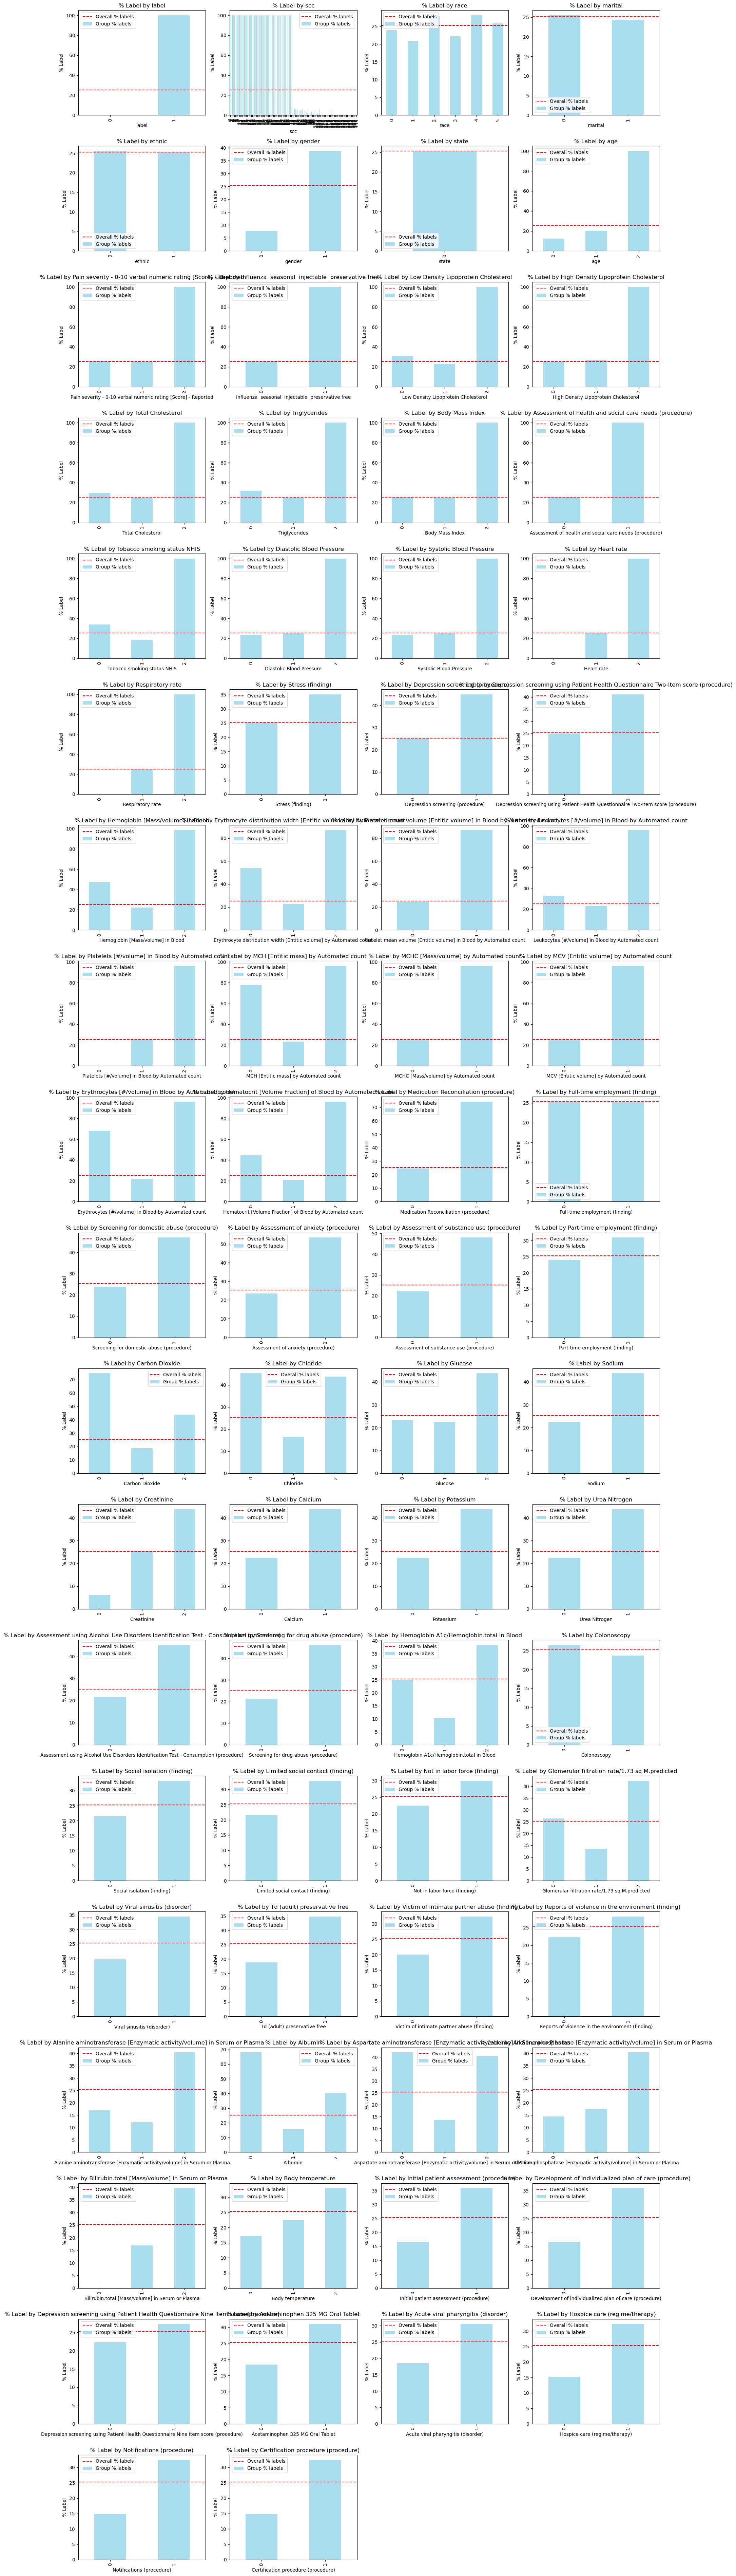

In [167]:
label_percentage = {}
for column in numeric_columns:
    label_percentage[column] = df_encoded.groupby(column)['label'].mean() * 100

overall_label_percentage = df_encoded['label'].mean() * 100

fig, axes = plt.subplots(nrows=19, ncols=4, figsize=(18, 76))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    label_percentage[column].plot(kind='bar', ax=ax, color='skyblue', alpha=0.7, label='Group % labels')
    ax.axhline(overall_label_percentage, color='red', linestyle='--', label='Overall % labels')
    ax.set_title(f'% Label by {column}')
    ax.set_ylabel('% Label')
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Pacjenci z nowotworem i bez

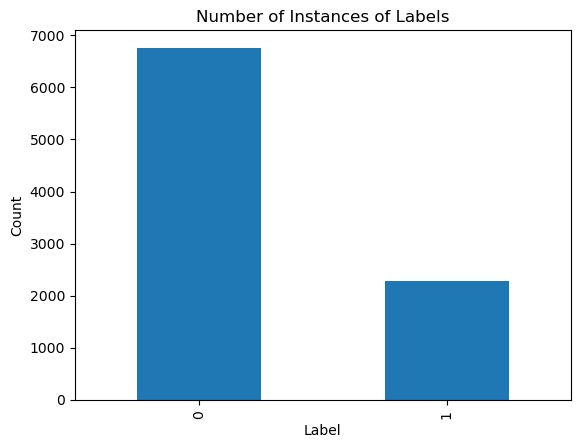

In [81]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Labels')
plt.show()

In [82]:
s = df.shape[0]

print('Procent wystąpień nowotworu płuc: ' + str(df['label'].value_counts()[1]/s*100))
print('Procent braku wystąpień nowotworu: ' + str(df['label'].value_counts()[0]/s*100))

Procent wystąpień nowotworu płuc: 25.287356321839084
Procent braku wystąpień nowotworu: 74.71264367816092


Wniosek: Większość pacjentów nie ma nowotworu płuc - trzy czwarte pacjentów.
Jedna czwarta pacjentów choruje na nowotwór płuc.

### Rasy

In [112]:
unikalne_rasy = df['race'].unique()
unikalne_r = df_encoded['race'].unique()
print("Unikalne rasy: ", unikalne_rasy)
print("Unikalne rasy: ", unikalne_r)

Unikalne rasy:  ['white' 'black' 'hawaiian' 'asian' 'native' 'other']
Unikalne rasy:  [5 1 2 0 3 4]


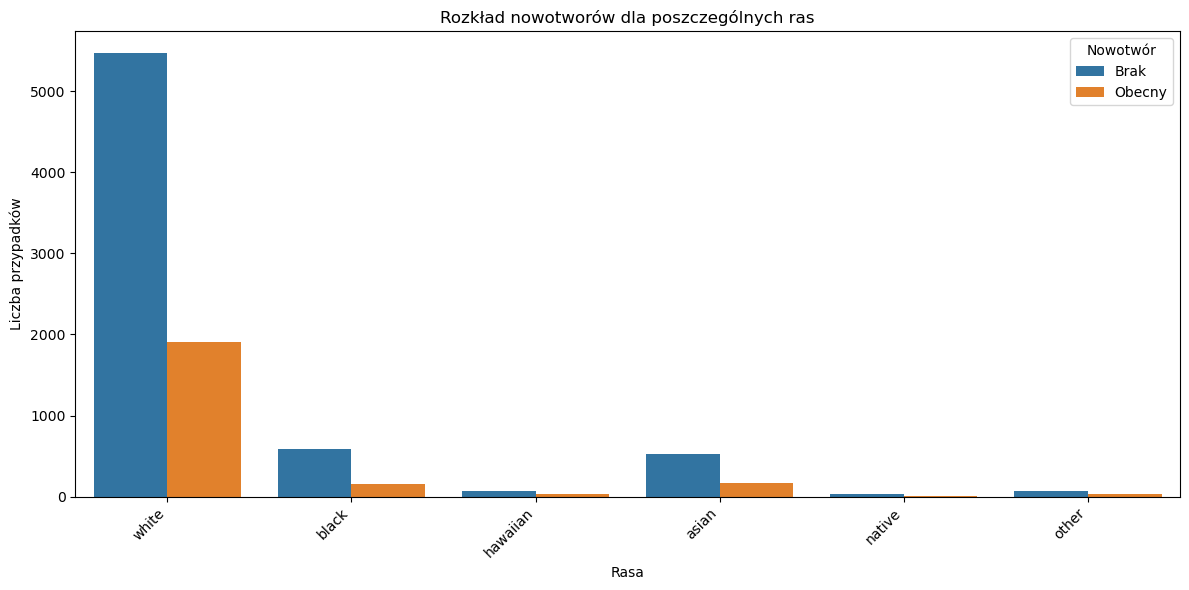

Procentowy udział przypadków nowotworów dla poszczególnych ras:
asian: brak - 76.05%, obecny - 23.95%
black: brak - 79.17%, obecny - 20.83%
hawaiian: brak - 72.12%, obecny - 27.88%
native: brak - 77.78%, obecny - 22.22%
other: brak - 71.88%, obecny - 28.12%
white: brak - 74.19%, obecny - 25.81%


In [93]:
df['label'] = df['label'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='label', data=df)
plt.title('Rozkład nowotworów dla poszczególnych ras')
plt.xlabel('Rasa')
plt.ylabel('Liczba przypadków')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nowotwór', labels=['Brak', 'Obecny'])
plt.tight_layout()
plt.show()

cases_by_race = df.groupby('race')['label'].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Procentowy udział przypadków nowotworów dla poszczególnych ras:")
for idx, row in cases_by_race.iterrows():
    print(f"{idx}: brak - {row['0']:.2f}%, obecny - {row['1']:.2f}%")

Wniosek: Rasa raczej nie wpływa na posiadanie lub nieposiadanie nowotworu płuc.

# Heatmapa zmiennych numerycznych

Heatmapa korelacji jest przydatna do analizy związków między zmiennymi numerycznymi. Im bliżej wartości 1 lub -1, tym silniejsza korelacja między tymi zmiennymi. Dla wartości bliskich 0 korelacja jest słabsza.

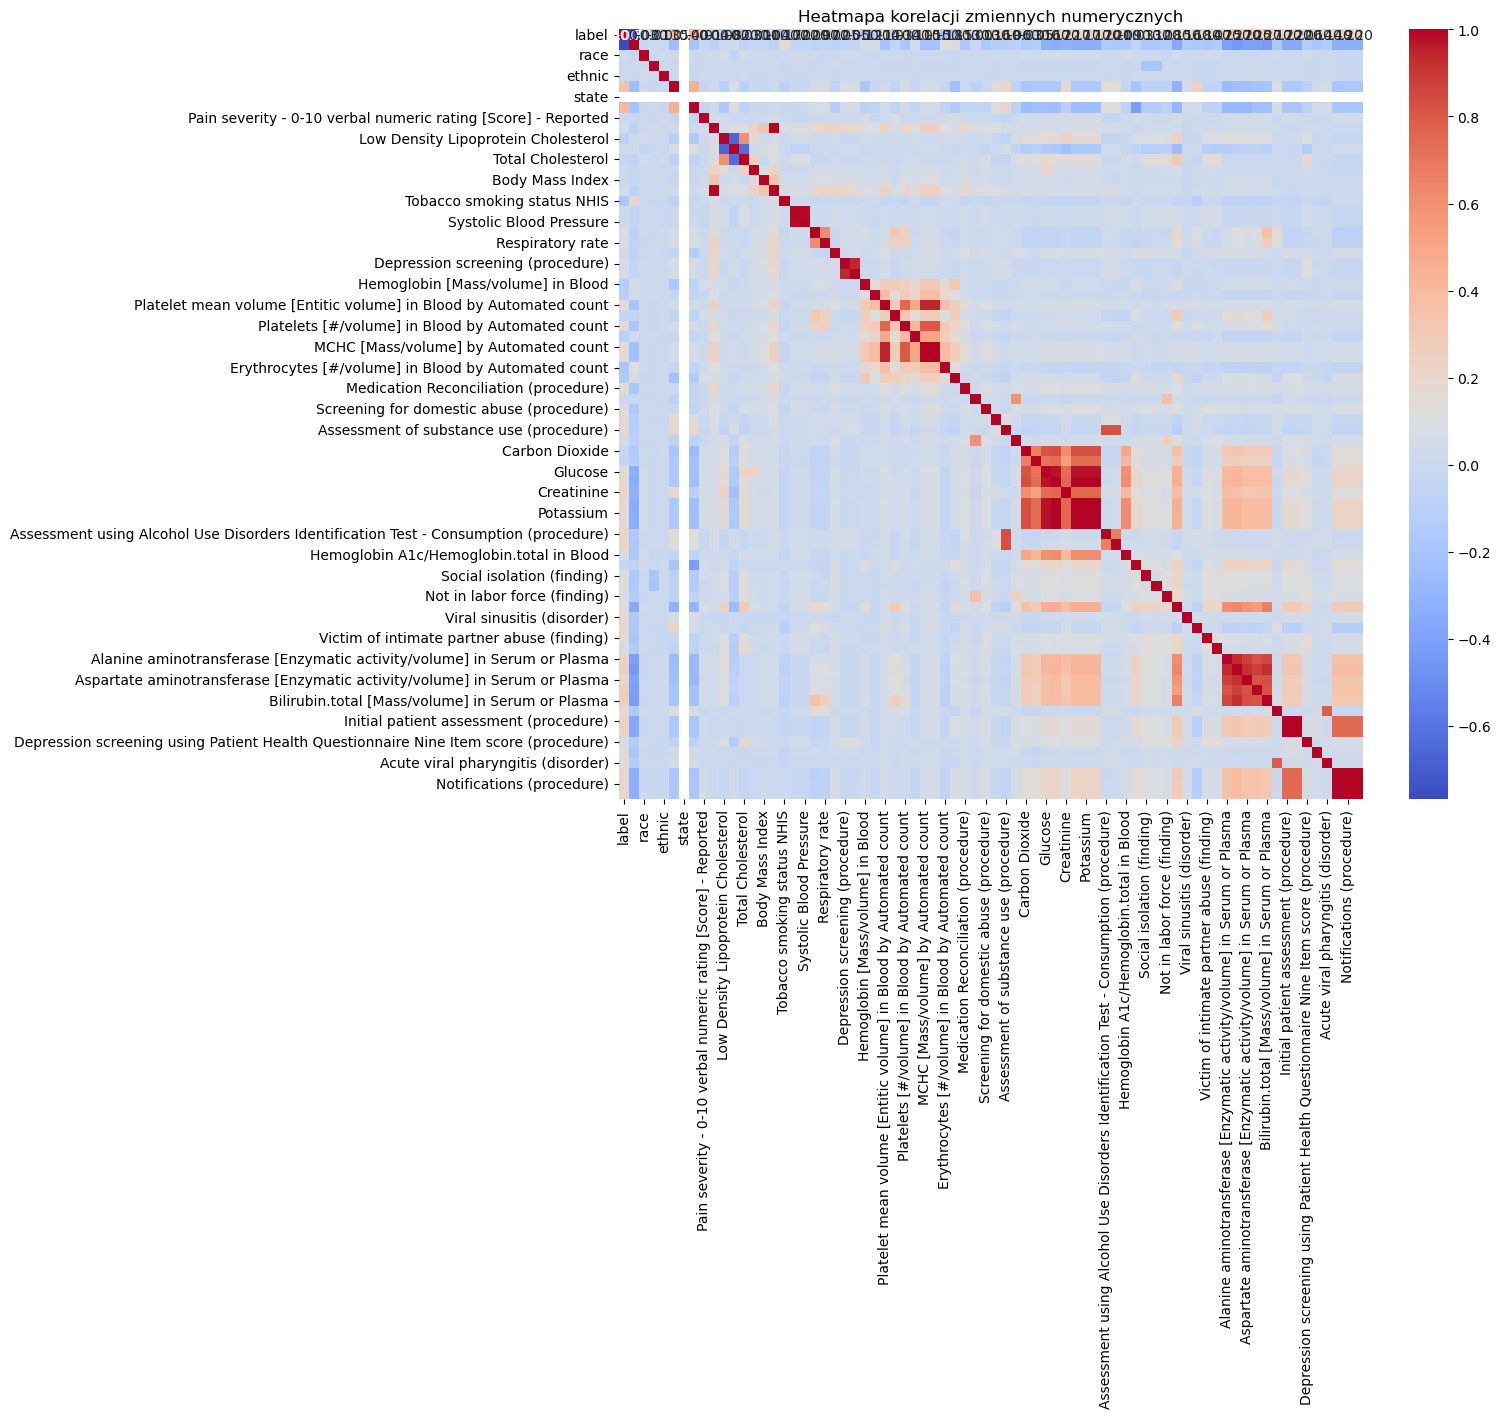

In [168]:
plt.figure(figsize=(12, 10))  # Rozmiar wykresu
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Wyświetlenie korelacji, z etykietami, użycie palety kolorów 'coolwarm' i formatowanie wartości do dwóch miejsc po przecinku
plt.title('Heatmapa korelacji zmiennych numerycznych')
plt.show()